In [23]:
import numpy as np
import matplotlib.pyplot as plt

In [24]:
x=np.arange(6)
x

array([0, 1, 2, 3, 4, 5])

In [25]:
y=2*x+3

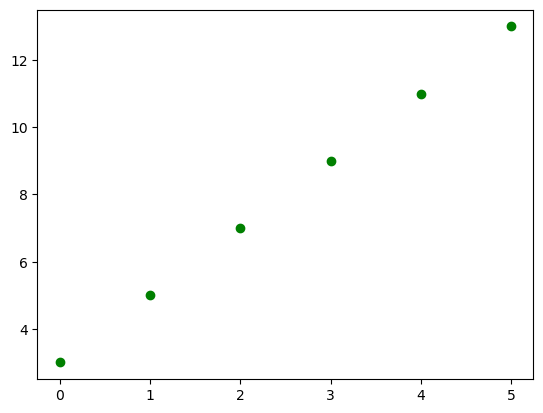

In [26]:
plt.plot(x,y,'go')

In [27]:
# =============  manual way================== pure math

In [28]:
np.cov(x,y)

array([[ 3.5,  7. ],
       [ 7. , 14. ]])

In [29]:
sigXY=np.cov(x,y)[0,1]

In [30]:
b=sigXY/x.var(ddof=1)
b

2.0

In [31]:
a=y.mean()-b*x.mean()
a

3.0

In [32]:
# yp=a+bx

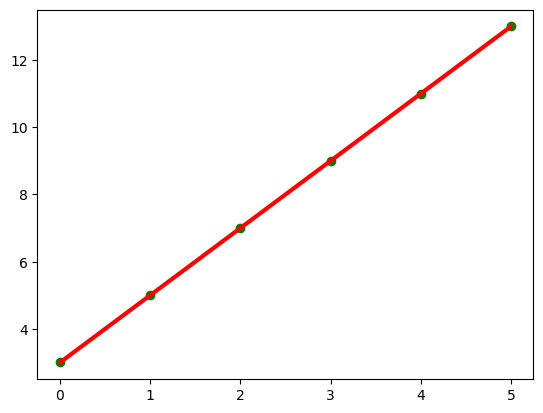

In [33]:
plt.plot(x,y,'go')
plt.plot(x,a+b*x,'r-',lw=3)

In [34]:
# ================= modern way============== pure math

In [35]:
X=np.array([x**i for i in range(2)]).T
X

array([[1, 0],
       [1, 1],
       [1, 2],
       [1, 3],
       [1, 4],
       [1, 5]], dtype=int32)

In [36]:
W=np.linalg.pinv(X.T@X)@X.T@y

In [37]:
f=lambda x,a,b: a+b*x

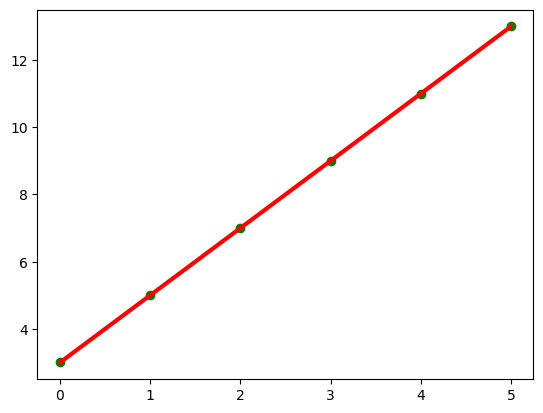

In [38]:
plt.plot(x,y,'go')
plt.plot(x,f(x,*W),'r-',lw=3)

In [39]:
#==============machine learning============math+stat year 2015+
#=========automatically============

In [40]:
f=lambda x,a,b: a+b*x

In [41]:
def loss(yp,y):
    J=(yp-y).T@(yp-y)/len(y)
    return J

In [42]:
def loss_grad(x,y,w):
    a,b=w
    yp=a+b*x
    a_grad=2*(yp-y).mean()
    b_grad=2*((yp-y)*x).mean()
    return np.array([a_grad,b_grad])
    

In [43]:
def train(x,y,epochs=500,lr=1e-3):
    W=np.random.randn(2)
    history=np.zeros(epochs)
    for i in range(epochs):
        W-=loss_grad(x,y,W)*lr
        #print(W)
        yp=f(x,*W)
        history[i]=loss(yp,y)
        if i%10==0:
            plt.plot(x,y,'go')
            plt.plot(x,f(x,*W),'r-',lw=3)
            plt.show()
            

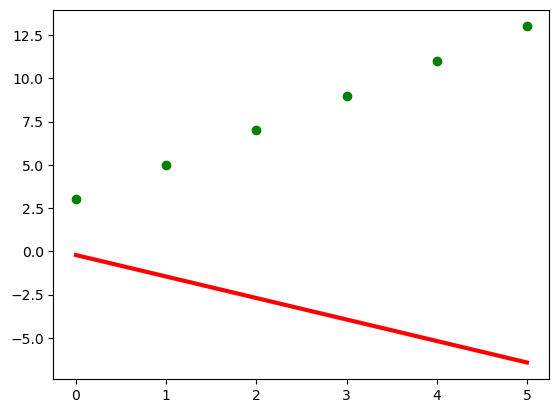

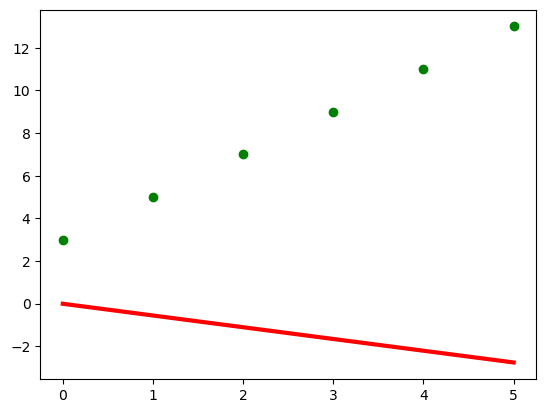

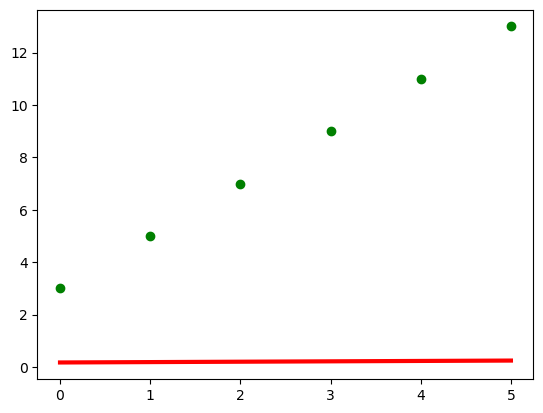

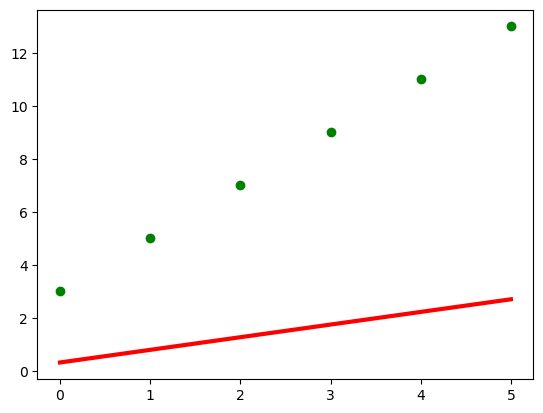

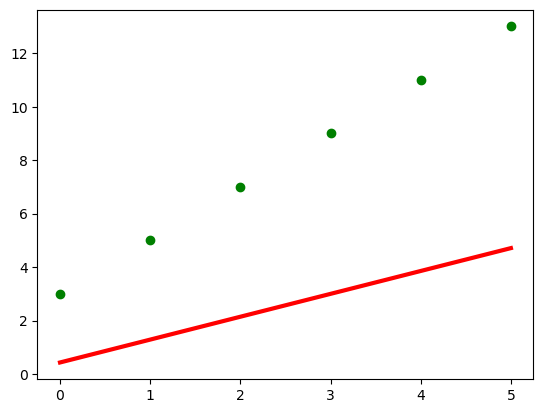

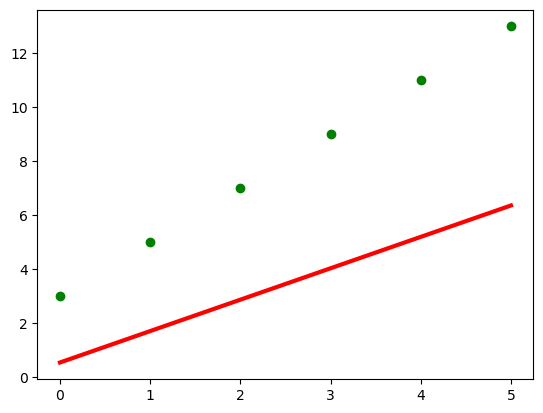

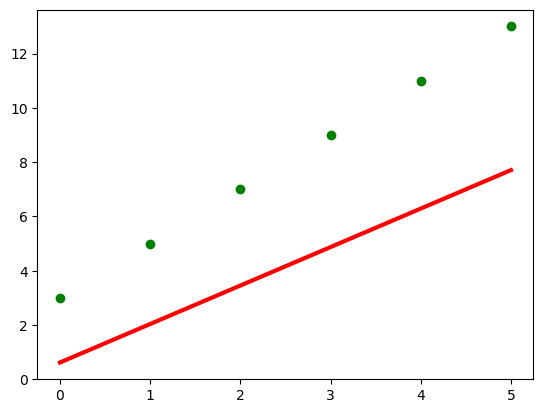

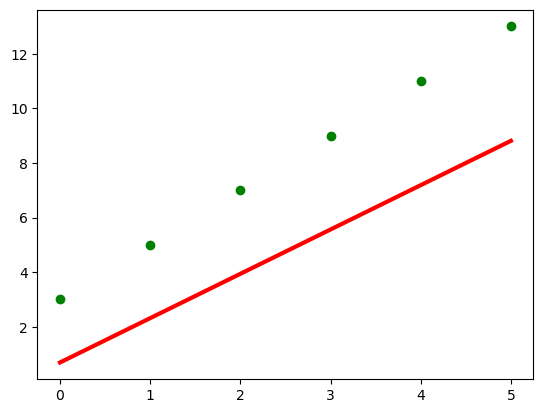

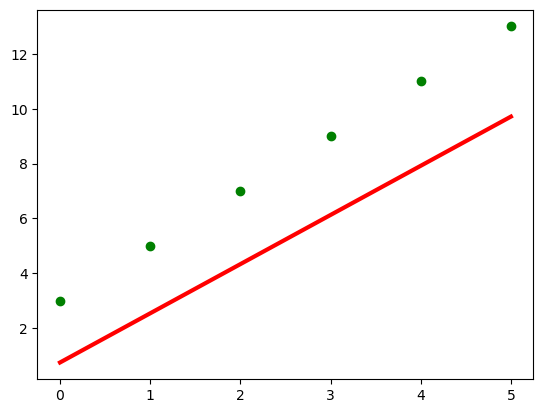

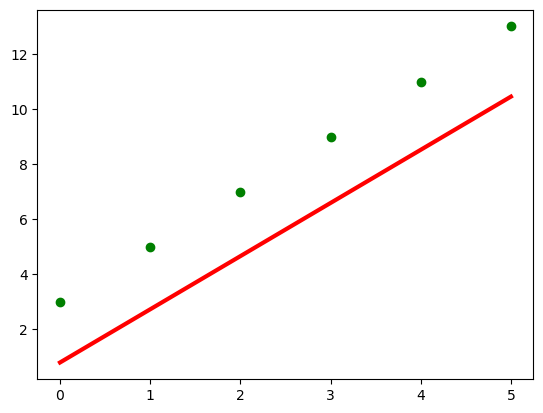

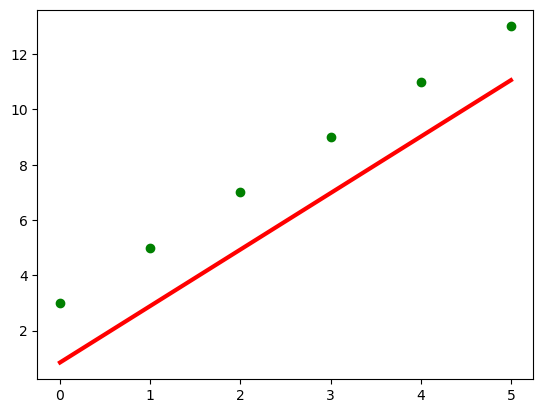

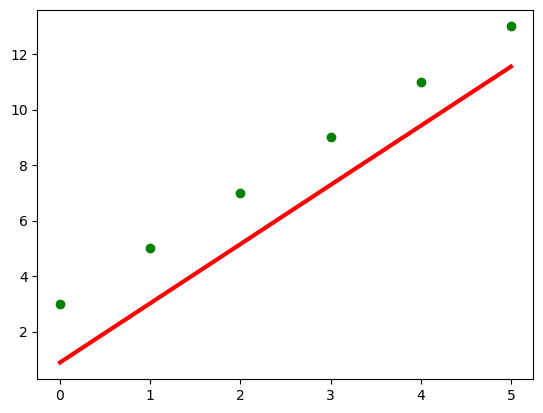

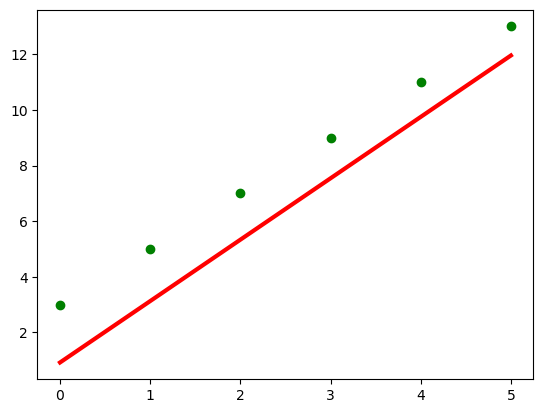

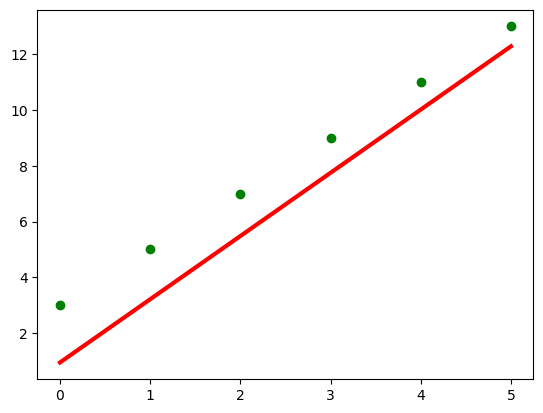

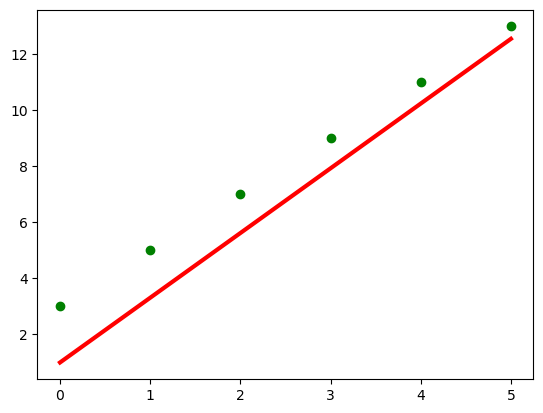

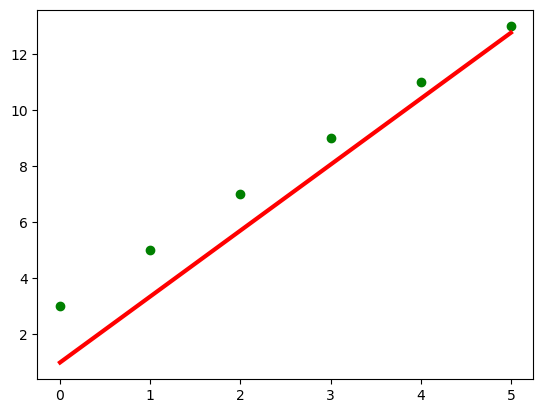

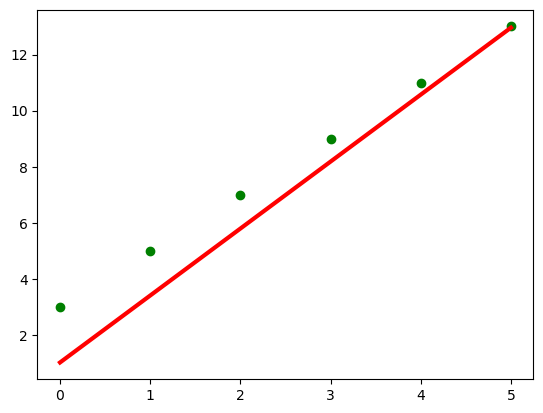

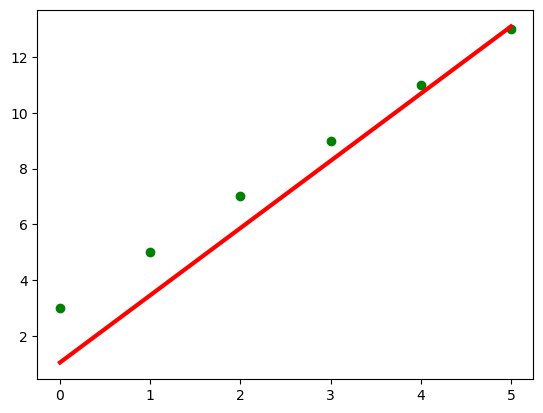

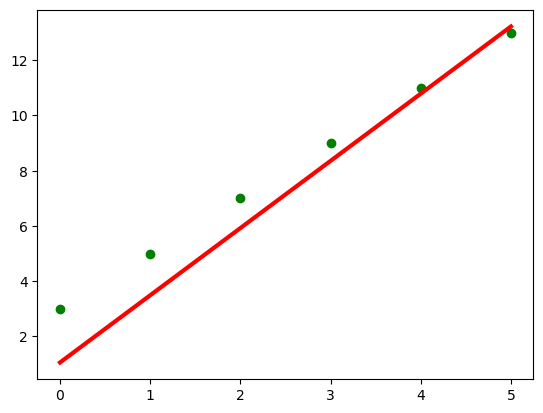

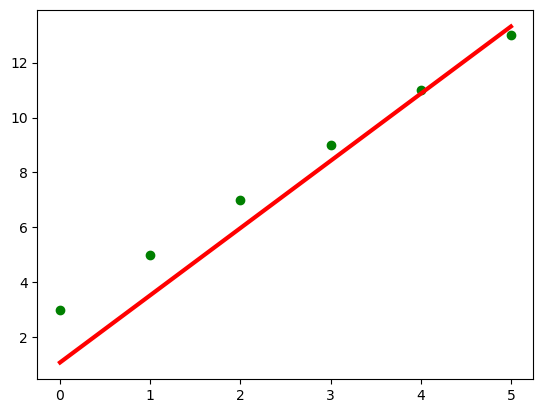

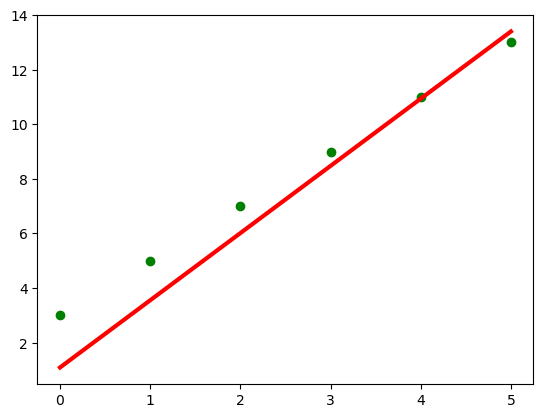

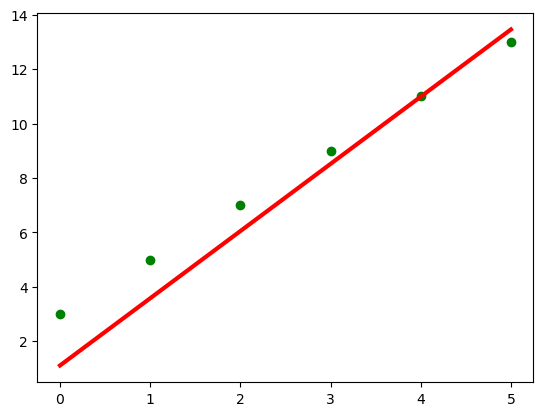

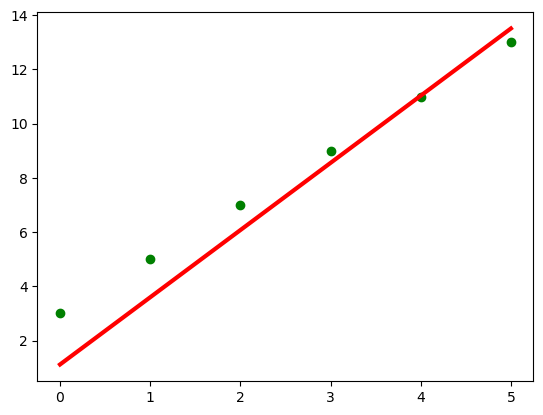

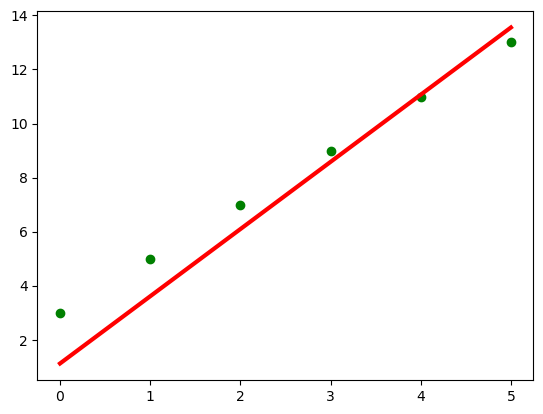

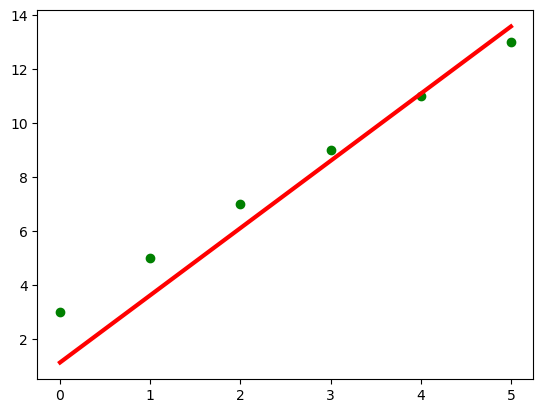

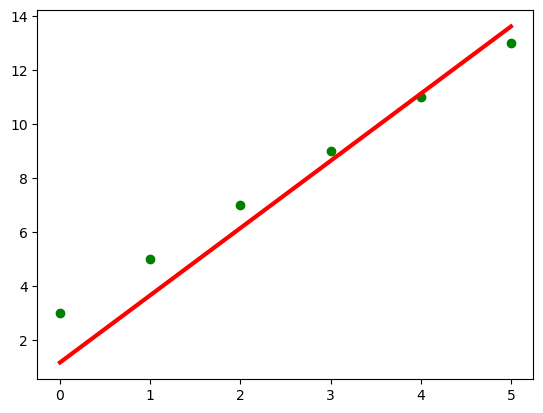

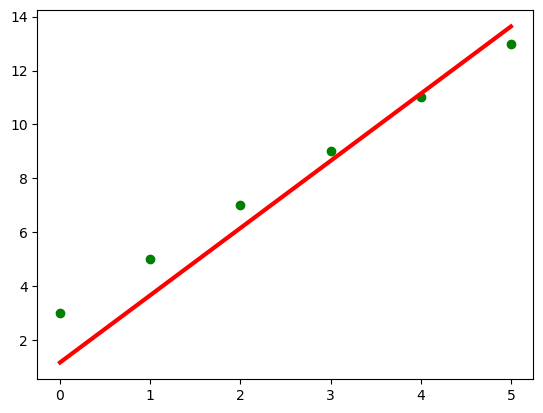

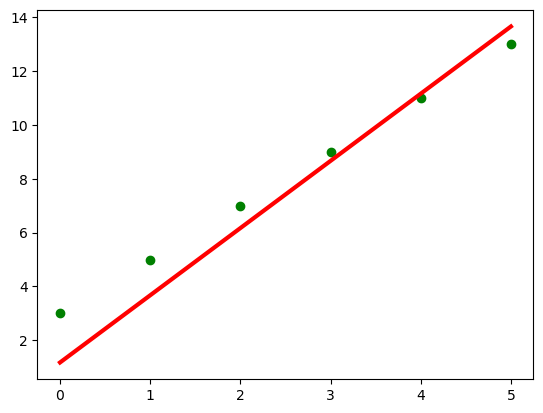

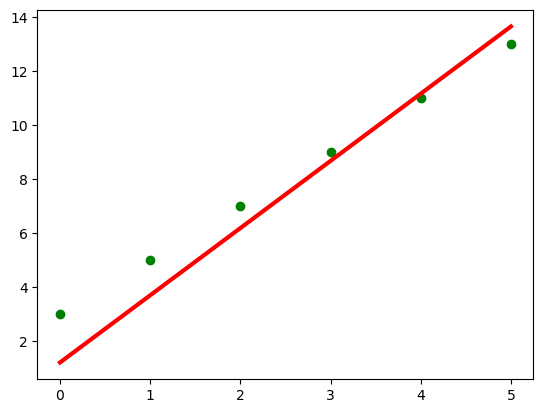

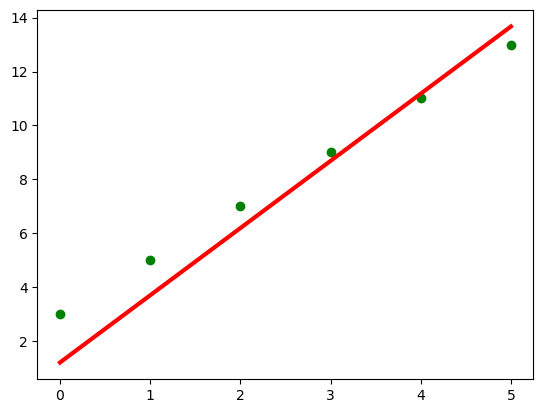

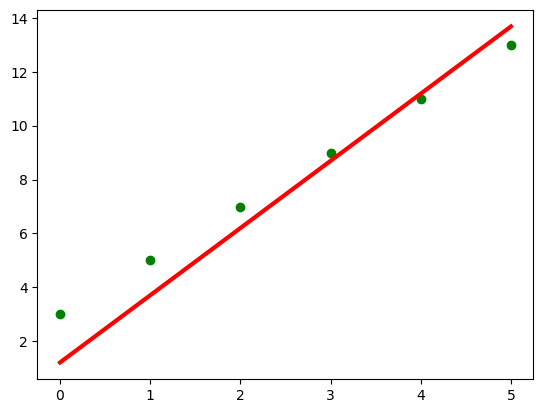

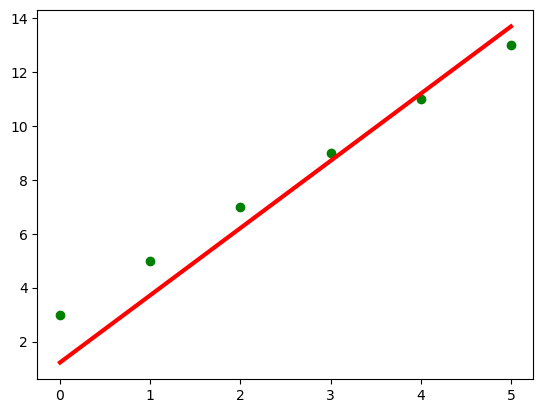

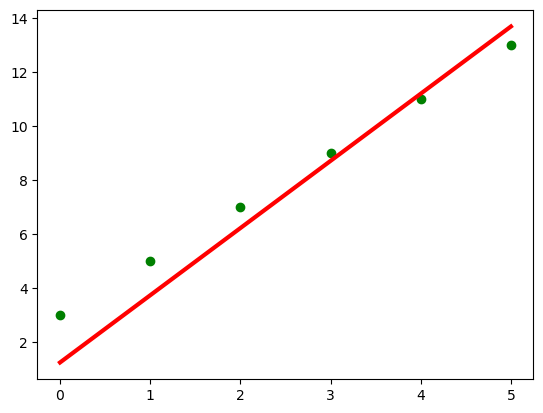

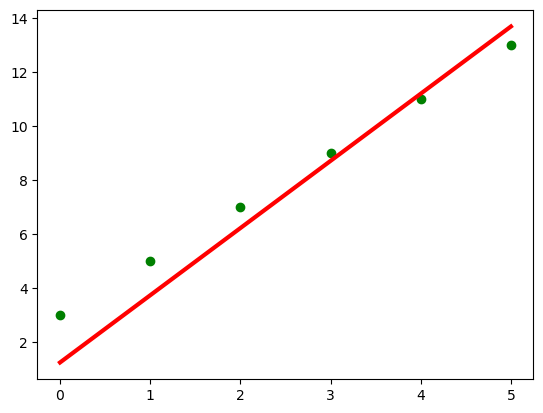

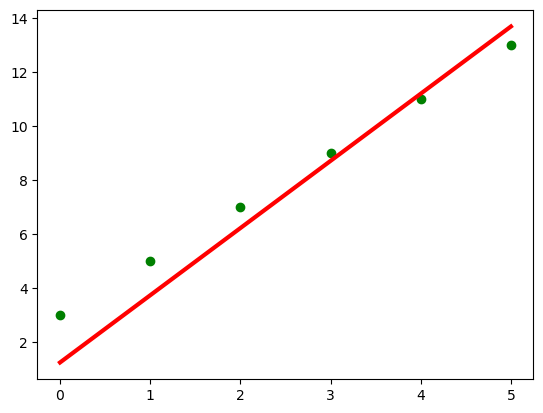

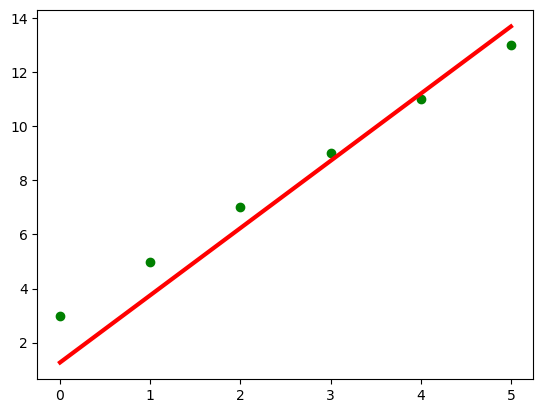

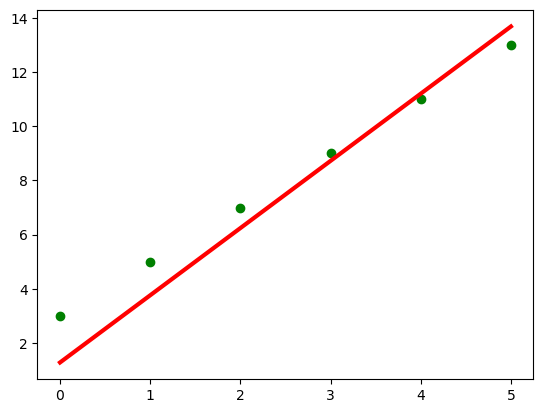

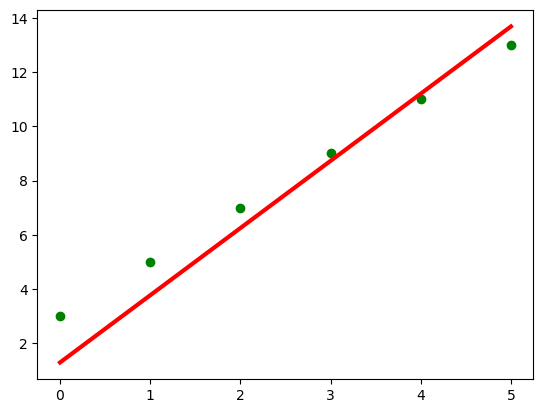

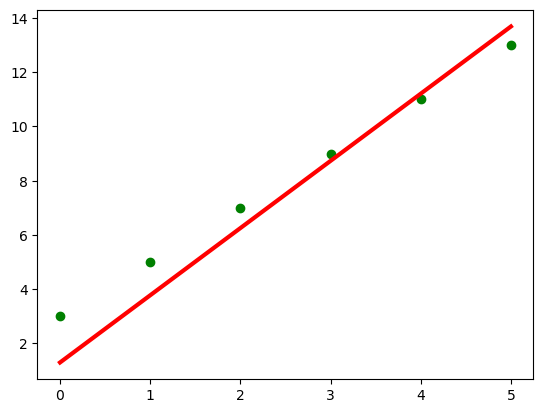

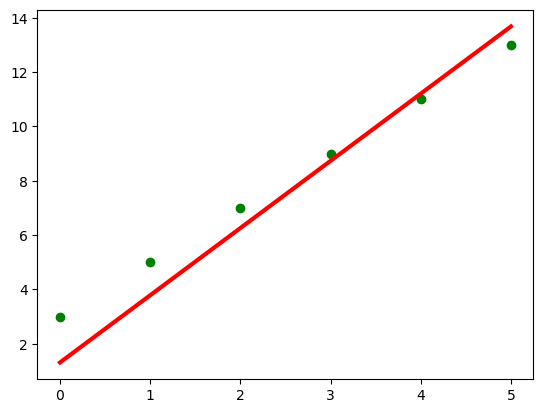

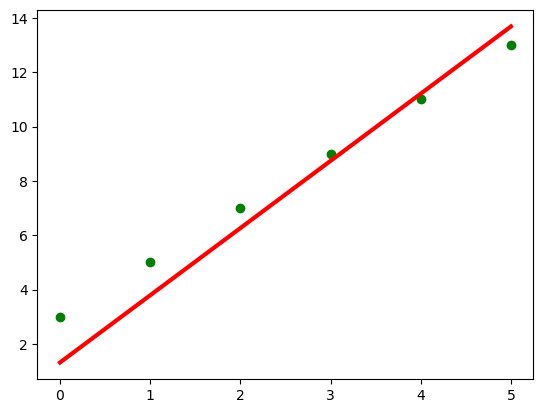

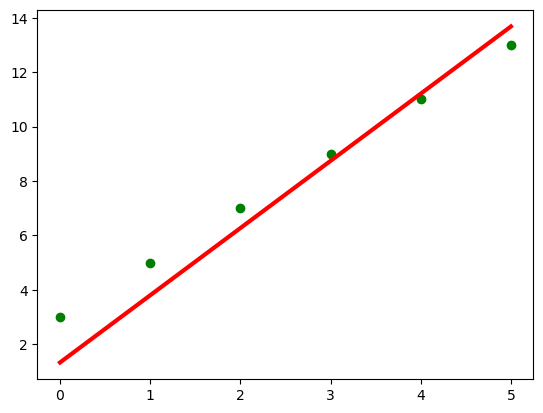

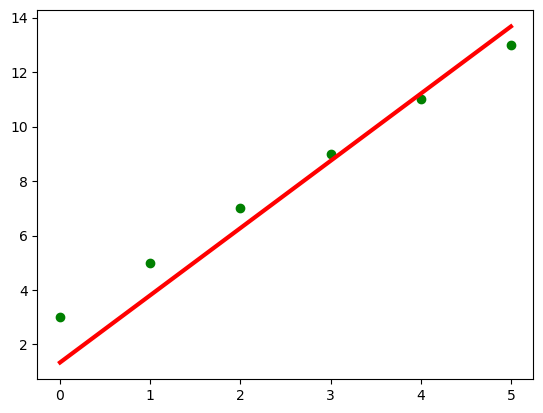

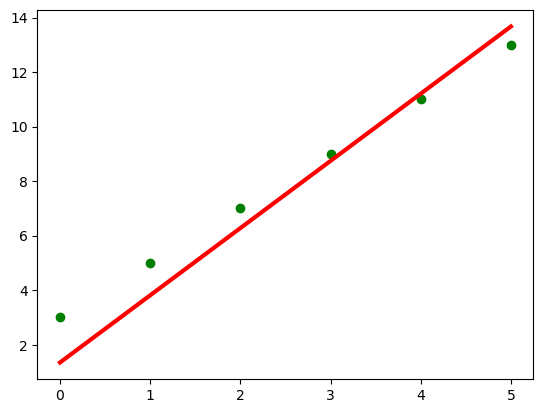

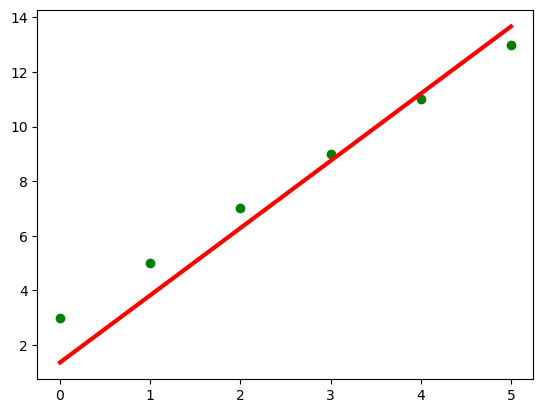

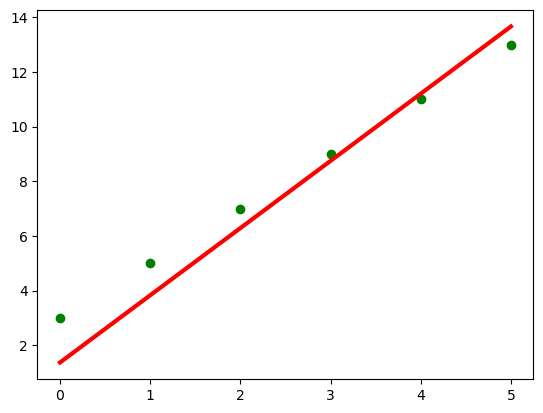

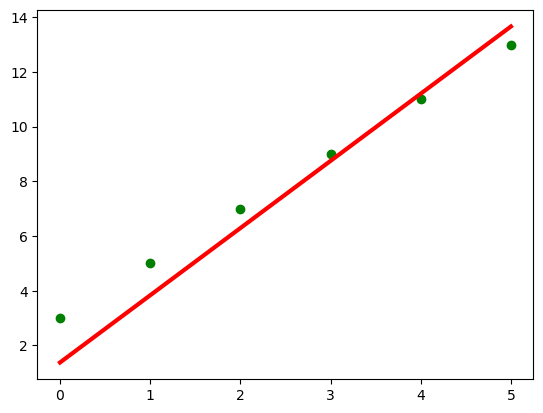

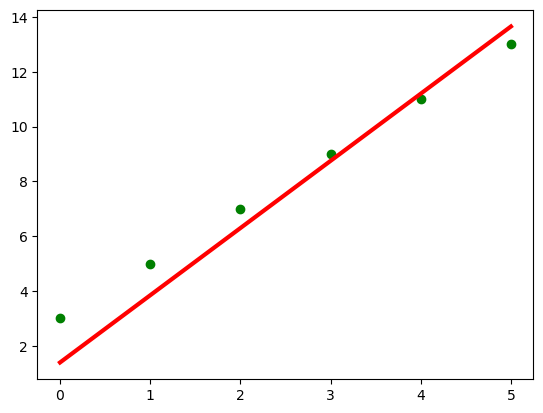

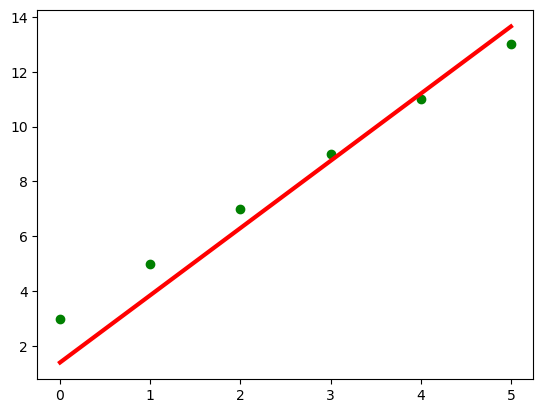

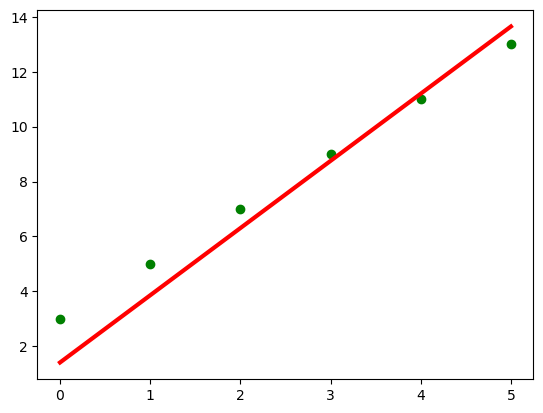

In [44]:
train(x,y)